
# Lead Score Case Study

## Problem Statement

X Education, an education company, offers online courses to industry professionals. Each day, numerous professionals interested in these courses visit their website to browse the available options.


The company promotes its courses across various websites and search engines like Google. When visitors arrive on the website, they may browse courses, fill out a form, or watch videos. If they provide their email address or phone number in a form, they are classified as leads. Additionally, the company obtains leads through past referrals. After acquiring these leads, the sales team reaches out via calls and emails. Through this process, some leads are converted, while most are not. The typical lead conversion rate at X Education is around 30%

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone..

### Goals of the Case Study

There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [441]:
#importing neccesary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
# import Warning libtr=rary to supress the warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
leads = pd.read_csv("C:\\Users\\Suresh\\Downloads\\Lead Scoring Assignment\\Leads.csv")

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Missing Values treatment

#### Handling the 'Select' level that is present in many of the categorical variables

##### We notice that many columns contain 'Select' values, likely because the customer did not choose an option from the list. These 'Select' values are equivalent to NULL. Therefore, we can convert them to null values.

In [10]:
leads['Specialization'].value_counts()['Select']

1942

In [11]:
type(leads)

pandas.core.frame.DataFrame

In [12]:
# Initialize an empty dictionary to store the counts
select_counts = {}

# Loop through each column in the dataframe
for i in leads.columns:
    # Count the occurrences of 'Select' in the current column
    count = leads[i].astype(str).str.contains('Select', case=False, na=False).sum()
    if count > 0:
        select_counts[i] = count

# Print the result
for i, count in select_counts.items():
    print(f"'{i}' column contains 'Select' {count} times")

'Specialization' column contains 'Select' 1942 times
'How did you hear about X Education' column contains 'Select' 5043 times
'Lead Profile' column contains 'Select' 4146 times
'City' column contains 'Select' 2249 times


In [13]:
s_columns = list(select_counts.keys())

In [14]:
s_columns

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [15]:
# Replacing in the dataframe columns values containing the text 'Select' 

leads[s_columns] = leads[s_columns].replace('Select', np.NaN)


In [16]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
# Find percentage of null values in the columns
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

##### We observe that there are columns with missing values exceeding 40%, so we will drop those columns.

In [18]:
#Droping the high missin val columns
leads = leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [19]:
leads.shape

(9240, 30)

In [20]:
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

###### Next high missing value percentage is the City, 39%. City is a categorical column we can find the mode and we can impute missing value with it

In [21]:
leads['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [22]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


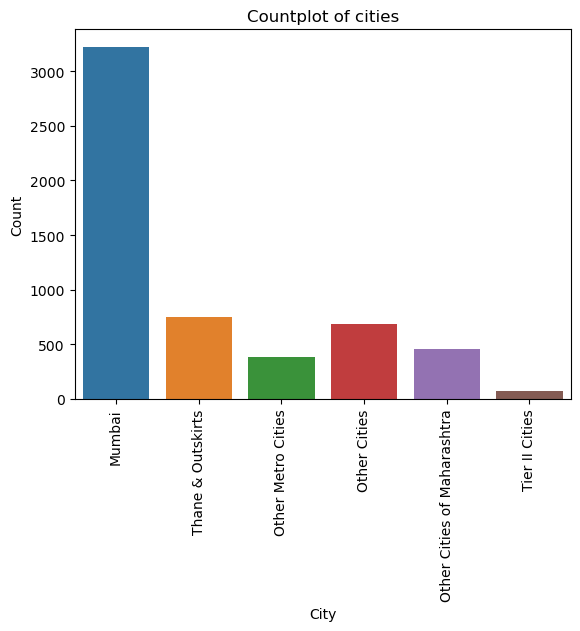

In [23]:
# Create a countplot
sns.countplot(x='City', data=leads)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Countplot of cities')
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### The categorical column "City" predominantly shows leads originating from Mumbai. Therefore, we will replace any missing values in the "City" column with "Mumbai".

In [24]:
# Replacing the missing values in the 'City' variable with 'Mumbai'

leads['City']=leads['City'].replace(np.nan,'Mumbai')

In [25]:
leads['City'].isnull().sum() #missing values are filled

0

#### The next highest missing value percentage is observed in the "Specialization" column, at 37%. 

In [26]:
leads['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

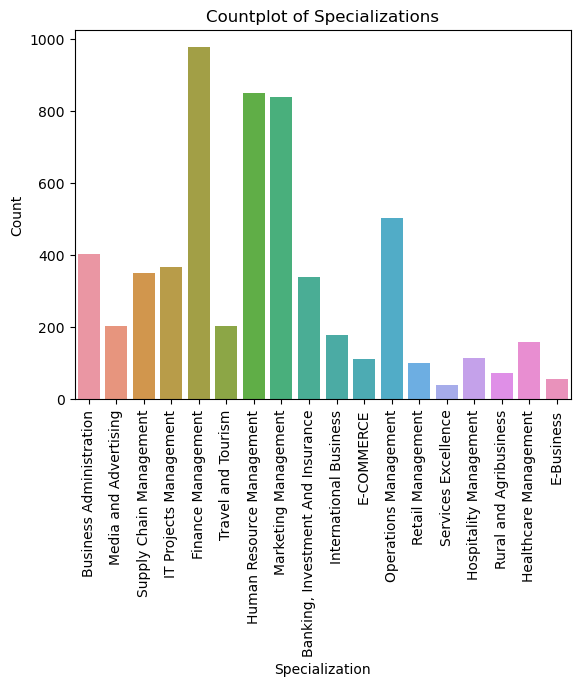

In [27]:
# Create a countplot
sns.countplot(x='Specialization', data=leads)

# Add labels and title
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Countplot of Specializations')
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Given that this Specialization categorical column is non-mandatory and more relevant to working professionals, it's reasonable to assume that non-working leads might leave it blank. Therefore, it would be best to replace the missing values with 'Others'.

In [28]:
# Replacing the missing values in the 'Specialization' variable with 'Others'

leads['Specialization']=leads['Specialization'].replace(np.nan,'Others')

In [29]:
leads['Specialization'].isnull().sum()

0

In [30]:
leads['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

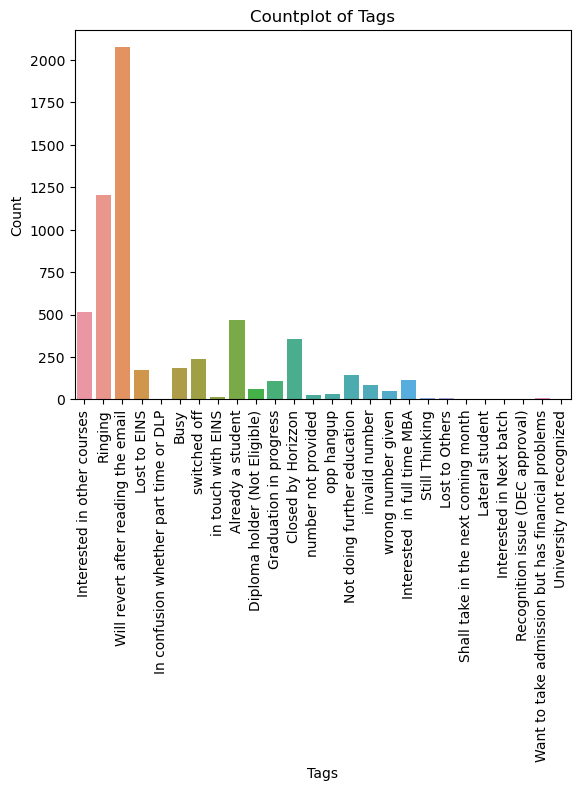

In [31]:
# Create a countplot
sns.countplot(x='Tags', data=leads)

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Countplot of Tags')
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Since most occuring value for Tags is "Will revert after reading the email" so will replace the value with the same.

In [32]:
# Replacing the missing data in the tags column with 'Will revert after reading the email'

leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

In [33]:
leads['Tags'].isnull().sum()

0

In [34]:
100*leads.isnull().sum()/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

#### The next highest missing value percentage is observed in the "What matters most to you in choosing a course" column, at 30%. 

In [35]:
# Check the valuecounts for category

leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

##### We can clearly see the data is skewed, and mostly it is for career prespective can be dropped


In [36]:
# Dropping the column 'What matters most to you in choosing a course'

leads = leads.drop('What matters most to you in choosing a course',axis=1)

#### The next highest missing value percentage is observed in the "What is your current occupation" column, at 30%. 

In [37]:
# Check the valuecounts for category

leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [38]:
# Check the percentages for this column

100*leads['What is your current occupation'].value_counts()/len(leads['What is your current occupation'])

What is your current occupation
Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: count, dtype: float64

In [39]:
#### The next highest missing value percentage is observed in the "What is your current occupation" column, at 30%. 

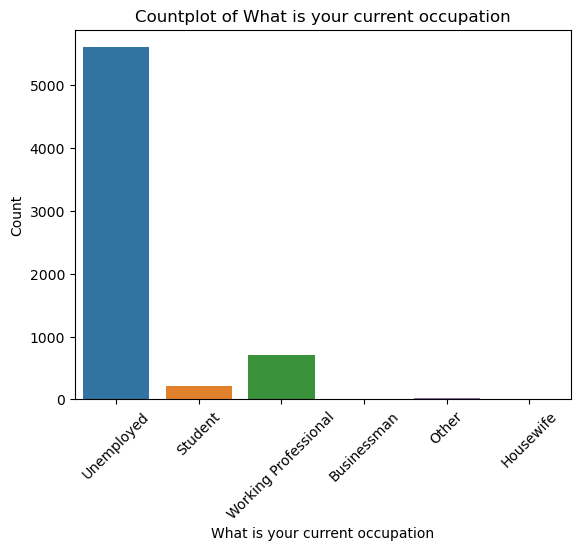

In [40]:
# Create a countplot
sns.countplot(x='What is your current occupation', data=leads)

# Add labels and title
plt.xlabel('What is your current occupation')
plt.ylabel('Count')
plt.title('Countplot of What is your current occupation')
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### It's evident that the majority of leads in the occupation variable are from the "Unemployed" category. Therefore, we can replace this category with "Unemployed".

In [41]:
# Replacing the missing data in the 'What is your current occupation' variable with 'Unemployed'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [42]:
leads['What is your current occupation'].isnull().sum()

0

In [43]:
#### The next highest missing value percentage is observed in the "Country" column, at 27%. 

In [44]:
# Find the value counts

leads['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [45]:
#Checking the city the belong to for the missing country values

leads[leads['Country'].isnull()].City.value_counts()

City
Mumbai                         2266
Thane & Outskirts                80
Other Cities                     55
Other Cities of Maharashtra      43
Other Metro Cities               15
Tier II Cities                    2
Name: count, dtype: int64

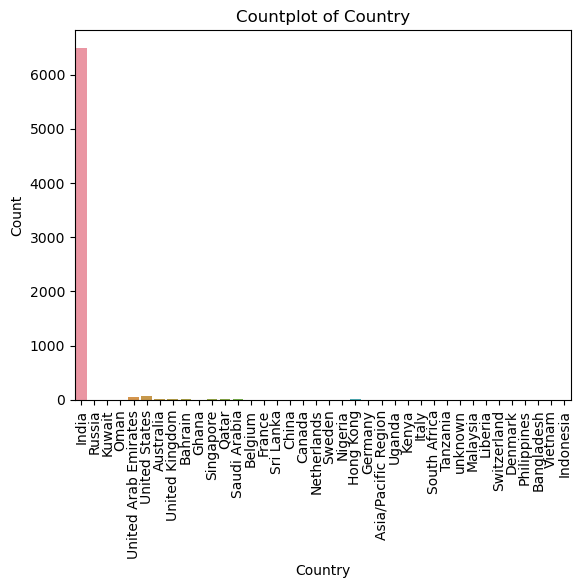

In [46]:
# Create a countplot
sns.countplot(x='Country', data=leads)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Countplot of Country')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### This field is skewed since it one of important fiels so we should handle this data, majority of leads originate from India, and their cities are also within India. Therefore, it's safe to replace missing values in the "Country" field with "India"

In [47]:
# Replacing the missing data in the 'Country' column with 'India'

leads['Country'] = leads['Country'].replace(np.nan,'India')

In [48]:
leads['Country'].isnull().sum()

0

In [49]:
# Check the missingvalues now post imputing missing values

100*leads.isnull().sum()/len(leads)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

#### There are still a few columns having only <2% missing values. Hence, we can safely drop the rows containing these missing values.

In [50]:
# Dropping the rows with 2% null values

leads.dropna(inplace = True)

In [51]:
# Here below the rows post treating the null alues

leads.shape

(9074, 29)

## Exploratory Data Anaysis

In [52]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Univariate Analysis

##### Converted

In [56]:
leads['Converted'].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

In [57]:
#percentage calculatin
100*leads['Converted'].value_counts()/len(leads)


Converted
0    62.144589
1    37.855411
Name: count, dtype: float64

In [58]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
import sys
print("Python version:")
print(sys.version)

Python version:
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


##### Percentage of leads got coverted: 38%

In [60]:
leads['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [74]:
leads['Conv'] = leads['Converted'].astype(str)

In [75]:
leads['Conv'].value_counts()

Conv
0    5639
1    3435
Name: count, dtype: int64

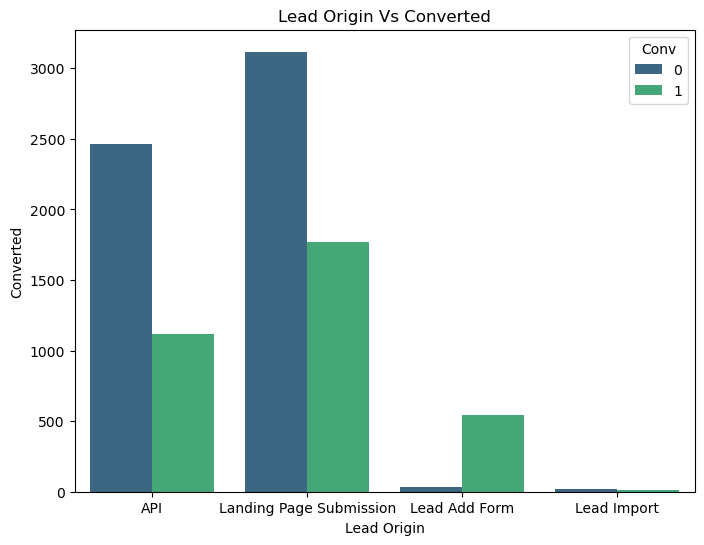

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Lead Origin', hue = 'Conv', data=leads, palette='viridis')

# Add labels and title
plt.xlabel('Lead Origin')
plt.ylabel('Converted')
plt.title('Lead Origin Vs Converted')

# Show the plot
plt.show()

#### Observation:
1. "API and Landing Page Submissions have a conversion rate of 30-35%, but they generate a substantial number of leads. 
2.  The Lead Add Form achieves a conversion rate of over 90%, although it does not generate a high volume of leads. Lead Imports are minimal in count."
3.  This version maintains the essential information while providing a clearer and more concise description.


To improve our overall lead conversion rate, we need to focus on enhancing the conversion rates for API and Landing Page Submissions, as these channels already generate a substantial number of leads. Additionally, we should aim to generate more leads through the Lead Add Form, which has a high conversion rate but currently attracts fewer leads.
This approach targets both increasing the quality of conversions for existing high-volume channels and boosting the lead generation for high-conversion channels.

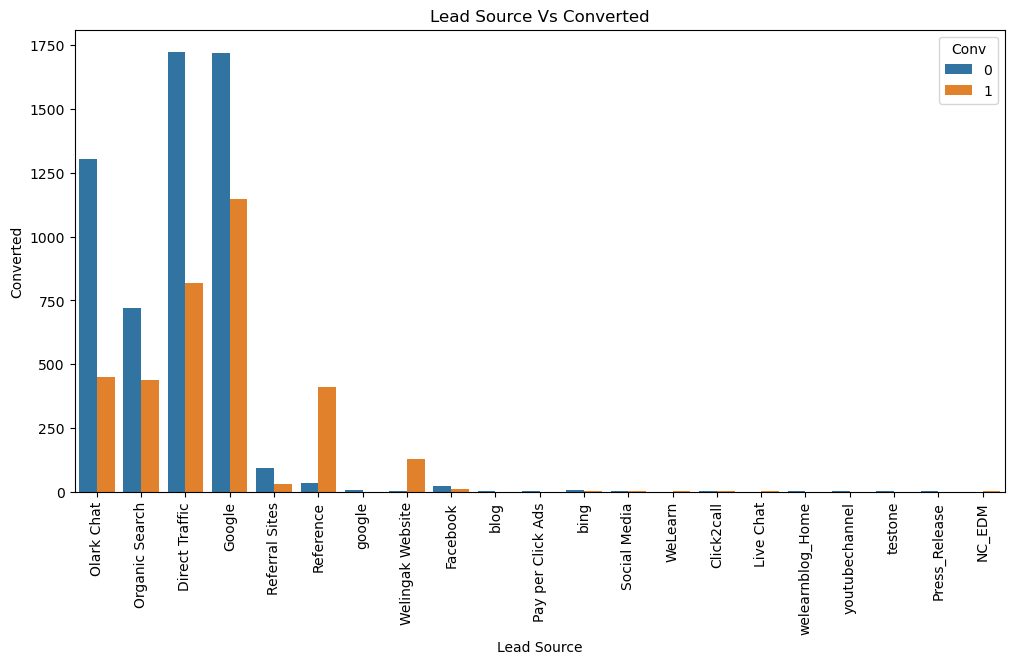

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Lead Source',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Lead Source')
plt.ylabel('Converted')
plt.title('Lead Source Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [87]:
# Replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [88]:
#"Create a new category 'Others' for some of the Lead Sources that have low values."This version is more concise and straightforward while retaining the key information.

leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

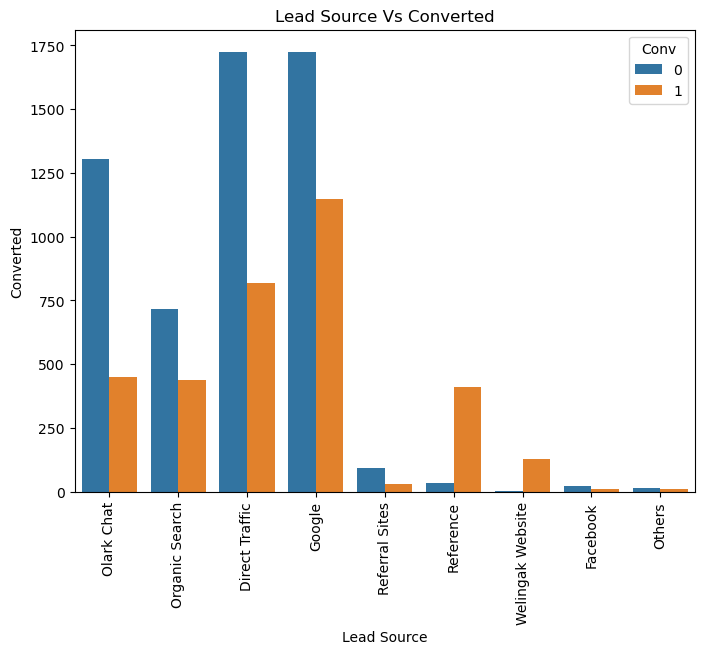

In [90]:
#Visualizing again
plt.figure(figsize=(8, 6))
sns.countplot(x='Lead Source',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Lead Source')
plt.ylabel('Converted')
plt.title('Lead Source Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### Observation

1. "Google and Direct traffic generate the highest number of leads. 
2. The conversion rate is particularly high for leads coming from references and the Welingak website."

Enhance the overall lead conversion rate, we should concentrate on increasing the conversion rates of leads from Olark chat, organic search, direct traffic, and Google. Additionally, it's crucial to generate more leads from references and the Welingak website.

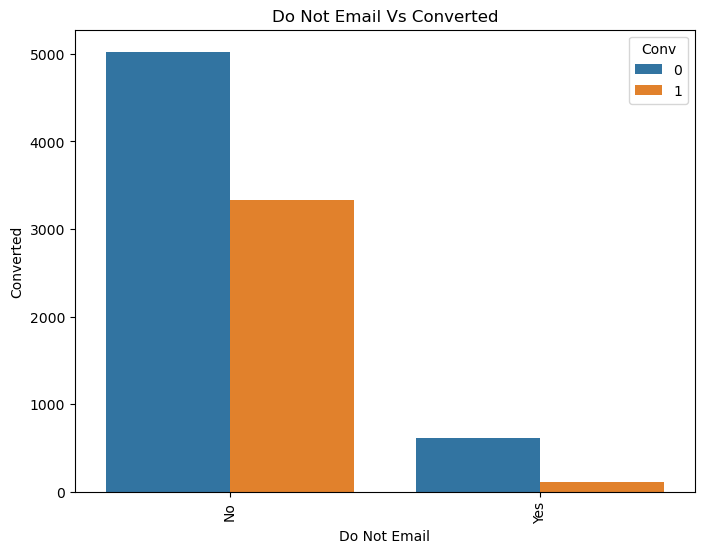

In [91]:
#Visualizing 
plt.figure(figsize=(8,6))
sns.countplot(x='Do Not Email',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Do Not Email')
plt.ylabel('Converted')
plt.title('Do Not Email Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### Observation:
Most of the leads belong to No category, not much descisions can be made

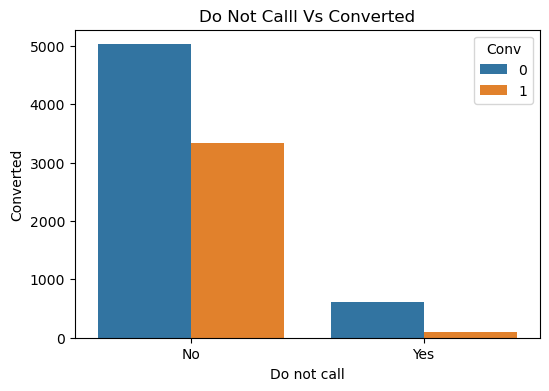

In [94]:
#Visualizing "Do not call"

plt.figure(figsize=(6,4))
sns.countplot(x='Do Not Email',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Do not call')
plt.ylabel('Converted')
plt.title('Do Not Calll Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most of the leads belong to No category, not much descisions can be made

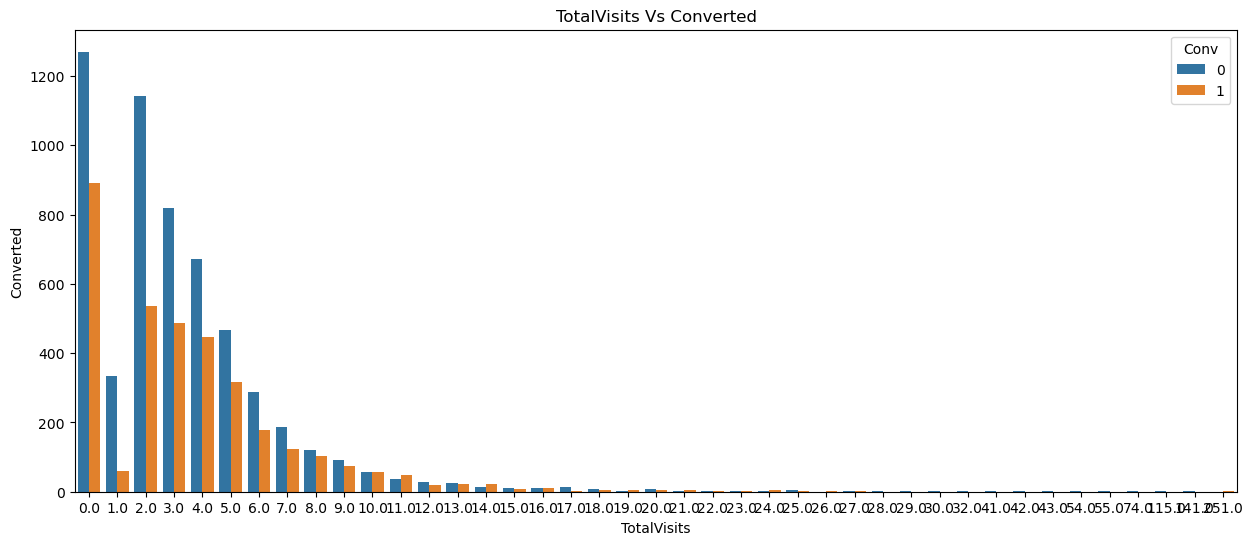

In [96]:
#Visualizing "TotalVisits"

plt.figure(figsize=(15,6))
sns.countplot(x='TotalVisits',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('TotalVisits')
plt.ylabel('Converted')
plt.title('TotalVisits Vs Converted')

# Show the plot
plt.show()

<Axes: >

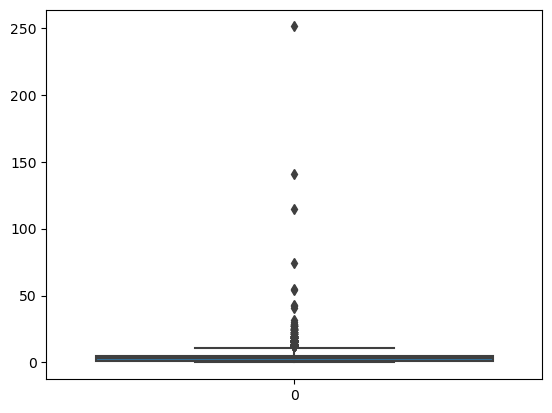

In [99]:
# 'TotalVisits' being continuos variable

sns.boxplot(leads['TotalVisits'])

In [100]:
#Note There are several outliers in the data. For our analysis, we will cap these outliers at the 95th percentile
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

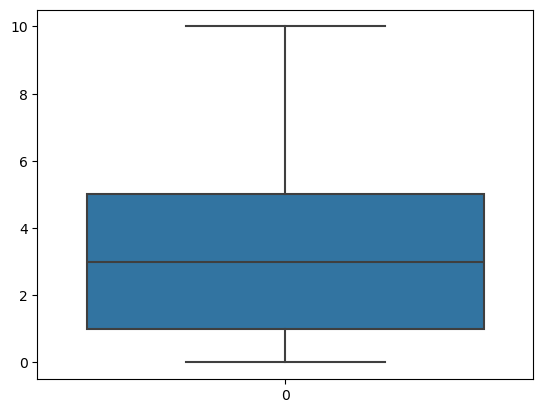

In [101]:
# Visualizing 'TotalVisits' variable again

sns.boxplot(leads['TotalVisits'])

<Axes: xlabel='Converted', ylabel='TotalVisits'>

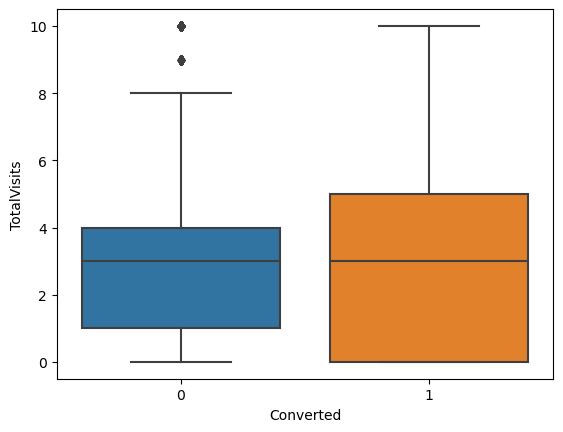

In [102]:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

##### As we can observe median of TotalVisits for both the categories is same, but not much of importance hence this variable can be dropped

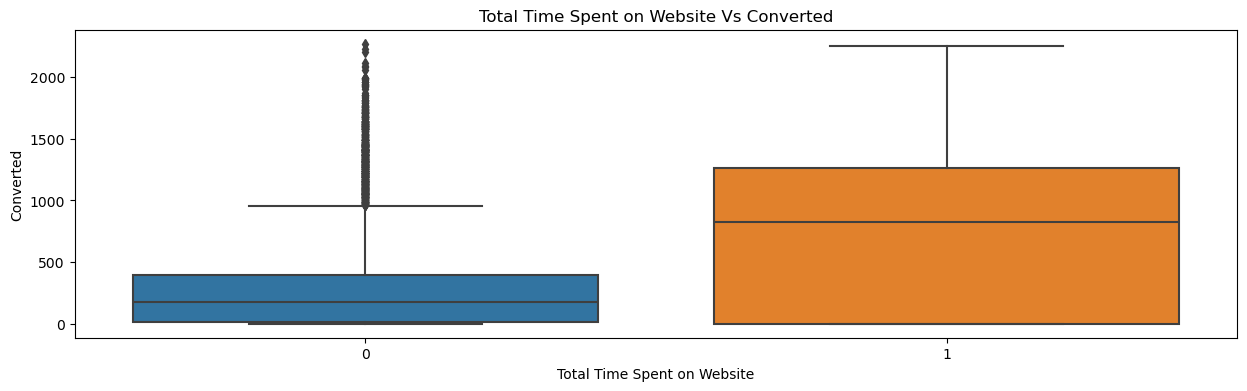

In [108]:
#Visualizing "Total Time Spent on Websitel" this being numerical column

plt.figure(figsize=(15,4))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Conv', data = leads)

# Add labels and title
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Converted')
plt.title('Total Time Spent on Website Vs Converted')

# Show the plot
plt.show()

#### Observaton:
##### Leads who invest additional time on the website demonstrate a higher likelihood of conversion. 
##### Enhancing website engagement is key to encouraging leads to spend more time on it.

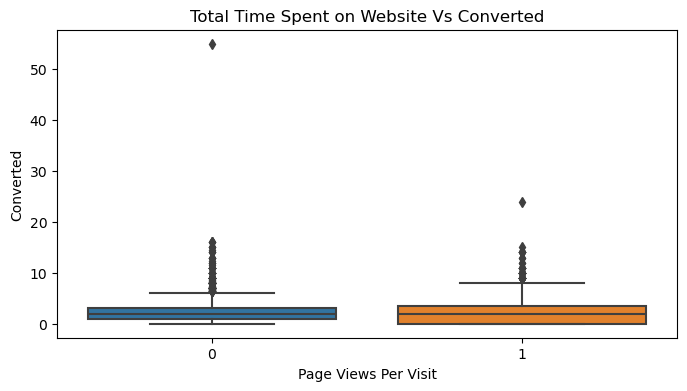

In [110]:
#Visualizing "Page Views Per Visit" this being numerical column

plt.figure(figsize=(8,4))
sns.boxplot(y = 'Page Views Per Visit', x = 'Conv', data = leads)

# Add labels and title
plt.xlabel('Page Views Per Visit')
plt.ylabel('Converted')
plt.title('Total Time Spent on Website Vs Converted')

# Show the plot
plt.show()

In [111]:
##### There are outliers in the data. We will cap the outliers to 95% value for analysis.

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

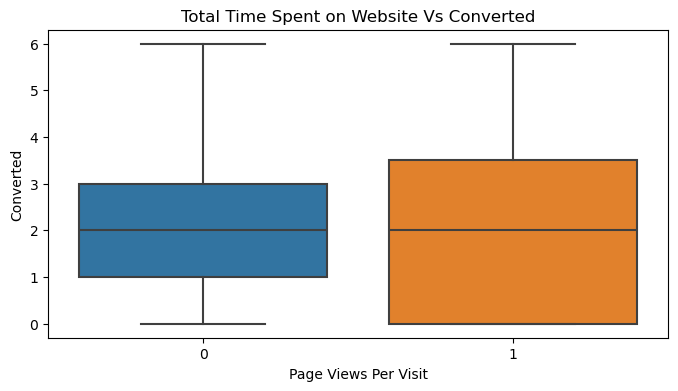

In [112]:
#Visualizing again "Page Views Per Visit" this being numerical column

plt.figure(figsize=(8,4))
sns.boxplot(y = 'Page Views Per Visit', x = 'Conv', data = leads)

# Add labels and title
plt.xlabel('Page Views Per Visit')
plt.ylabel('Converted')
plt.title('Total Time Spent on Website Vs Converted')

# Show the plot
plt.show()

#### Observation:
The median for both converted and unconverted leads is identical. No specific conclusion can be drawn regarding lead conversion based solely on Page Views Per Visit.

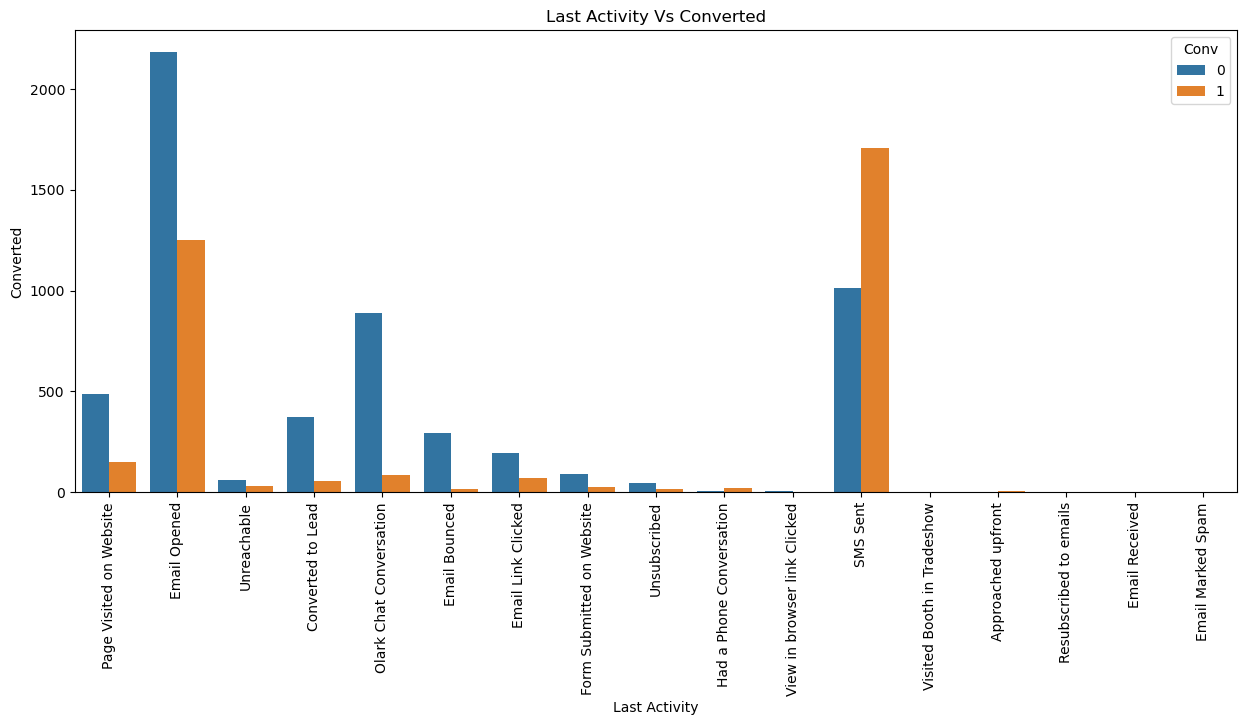

In [116]:
#Visualizing "Last Activity"

plt.figure(figsize=(15,6))
sns.countplot(x='Last Activity',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Last Activity')
plt.ylabel('Converted')
plt.title('Last Activity Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

##### 1.The majority of leads conclude their engagement with an email being opened as their last activity.
##### 2.Leads whose last activity is marked as "SMS Sent" exhibit an almost 60% conversion rate.

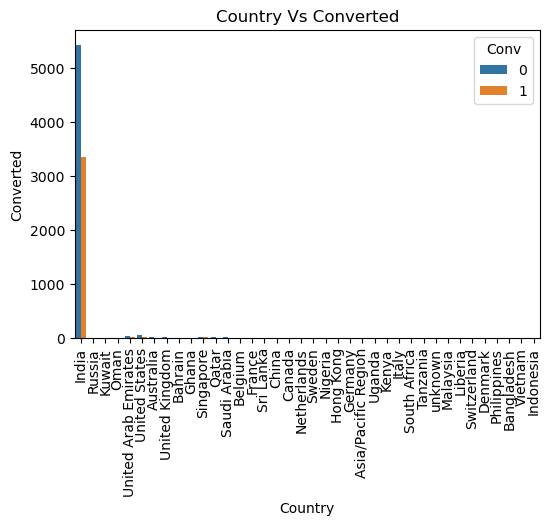

In [119]:
#Visualizing "Country"

plt.figure(figsize=(6,4))
sns.countplot(x='Country',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Converted')
plt.title('Country Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### Observation:

Most leads are from 'India' not much of use for conversion, so can be dropped

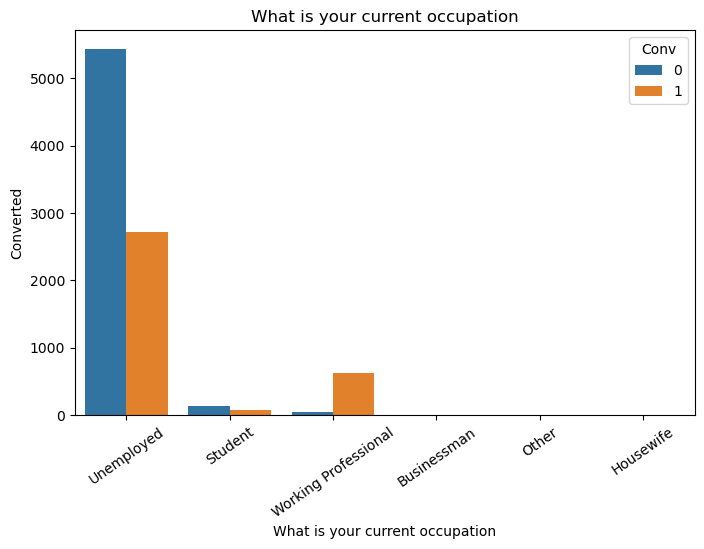

In [125]:
#Visualizing "What is your current occupation"

plt.figure(figsize=(8,5))
sns.countplot(x='What is your current occupation',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('What is your current occupation')
plt.ylabel('Converted')
plt.title('What is your current occupation')
plt.xticks(rotation = 35)

# Show the plot
plt.show()

#### Observation
    1. There is a high likelihood that working professionals opting for the course will enroll in it.
    2. Although the largest group comprises unemployed leads, their conversion rate ranges between 30-35%.

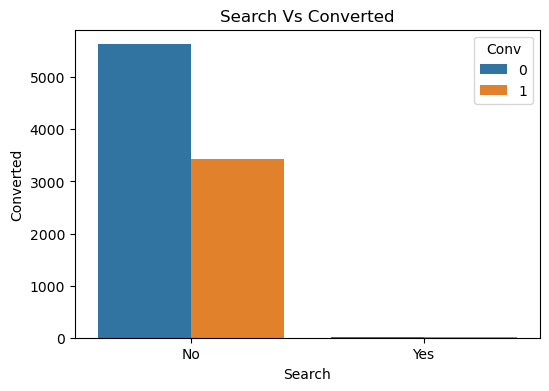

In [126]:
#Visualizing "Search"

plt.figure(figsize=(6,4))
sns.countplot(x='Search',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Search')
plt.ylabel('Converted')
plt.title('Search Vs Converted')

# Show the plot
plt.show()

Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

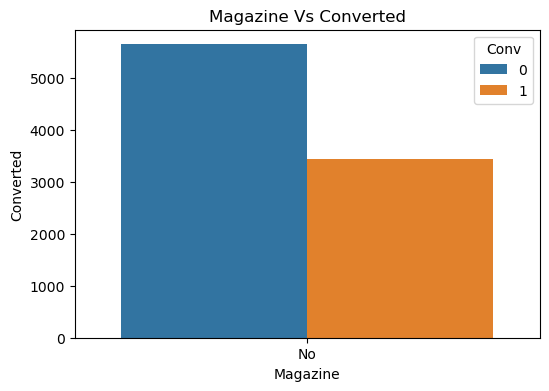

In [127]:
#Visualizing "Magazine"

plt.figure(figsize=(6,4))
sns.countplot(x='Magazine',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Magazine')
plt.ylabel('Converted')
plt.title('Magazine Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

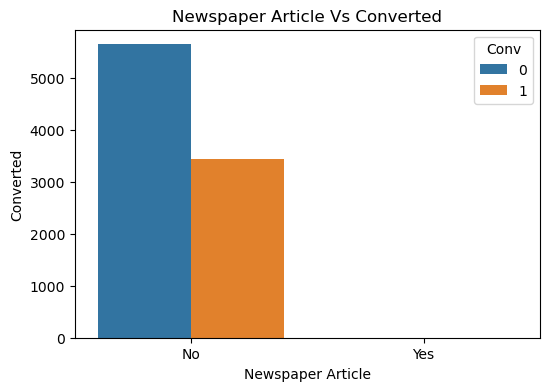

In [129]:
#Visualizing "Newspaper Article"

plt.figure(figsize=(6,4))
sns.countplot(x='Newspaper Article',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Newspaper Article')
plt.ylabel('Converted')
plt.title('Newspaper Article Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

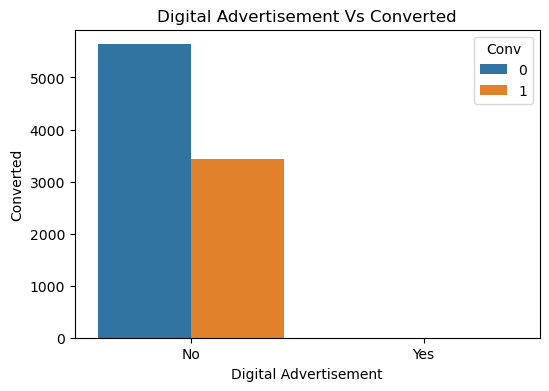

In [130]:
#Visualizing "Digital Advertisement"

plt.figure(figsize=(6,4))
sns.countplot(x='Digital Advertisement',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Digital Advertisement')
plt.ylabel('Converted')
plt.title('Digital Advertisement Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

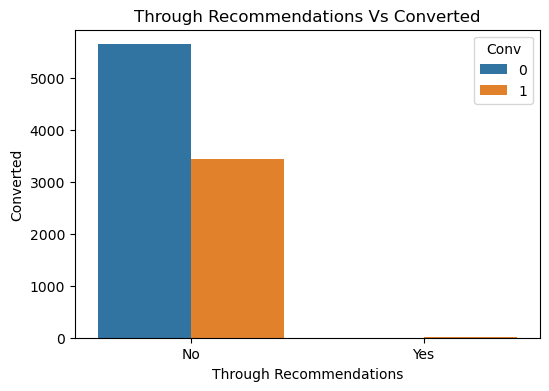

In [131]:
#Visualizing "Through Recommendations"

plt.figure(figsize=(6,4))
sns.countplot(x='Through Recommendations',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Through Recommendations')
plt.ylabel('Converted')
plt.title('Through Recommendations Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

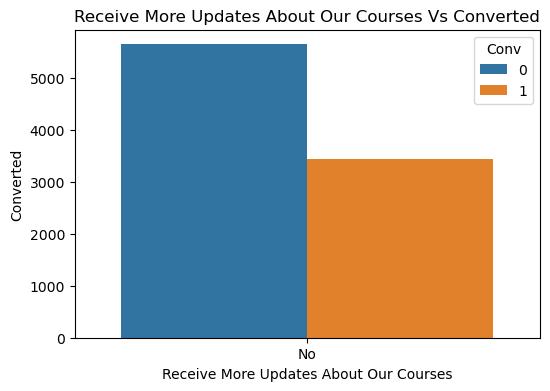

In [132]:
#Visualizing "Receive More Updates About Our Courses"

plt.figure(figsize=(6,4))
sns.countplot(x='Receive More Updates About Our Courses',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Receive More Updates About Our Courses')
plt.ylabel('Converted')
plt.title('Receive More Updates About Our Courses Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

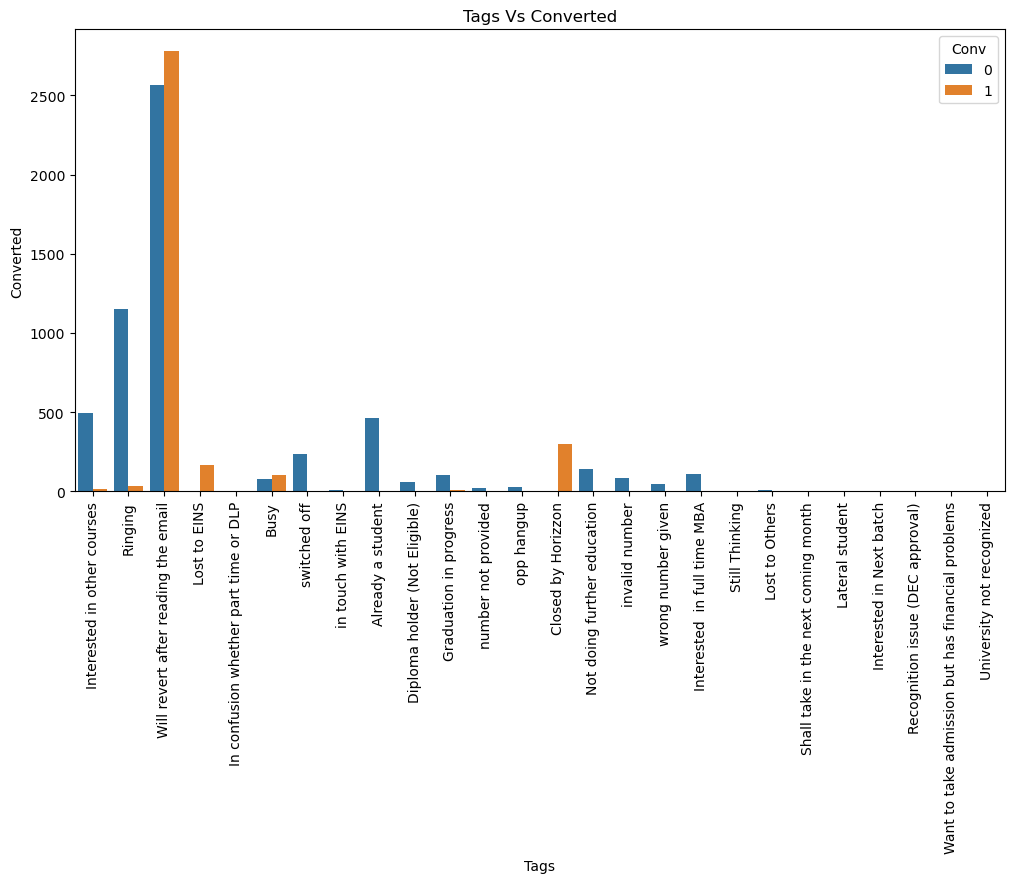

In [135]:
#Visualizing "Tags"

plt.figure(figsize=(12,6))
sns.countplot(x='Tags',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Converted')
plt.title('Tags Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### Observation:
    Since this column is generated by the sales team for their analysis, it is not available for model building, so, we need to remove this column before constructing the model.

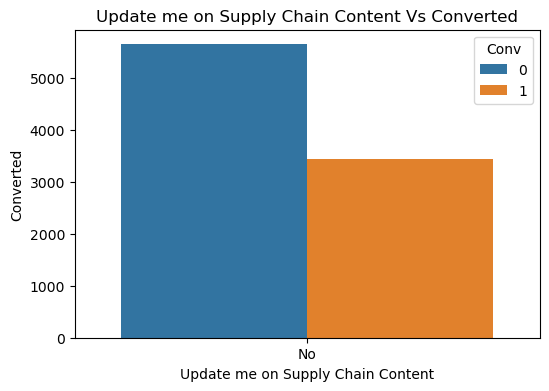

In [136]:
#Visualizing "Update me on Supply Chain Content"

plt.figure(figsize=(6,4))
sns.countplot(x='Update me on Supply Chain Content',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Update me on Supply Chain Content')
plt.ylabel('Converted')
plt.title('Update me on Supply Chain Content Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

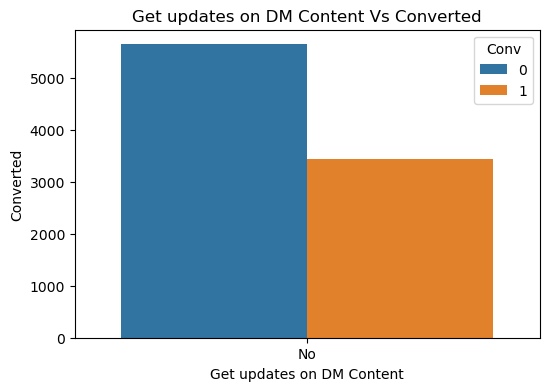

In [137]:
#Visualizing "Get updates on DM Content"

plt.figure(figsize=(6,4))
sns.countplot(x='Get updates on DM Content',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('Get updates on DM Content')
plt.ylabel('Converted')
plt.title('Get updates on DM Content Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

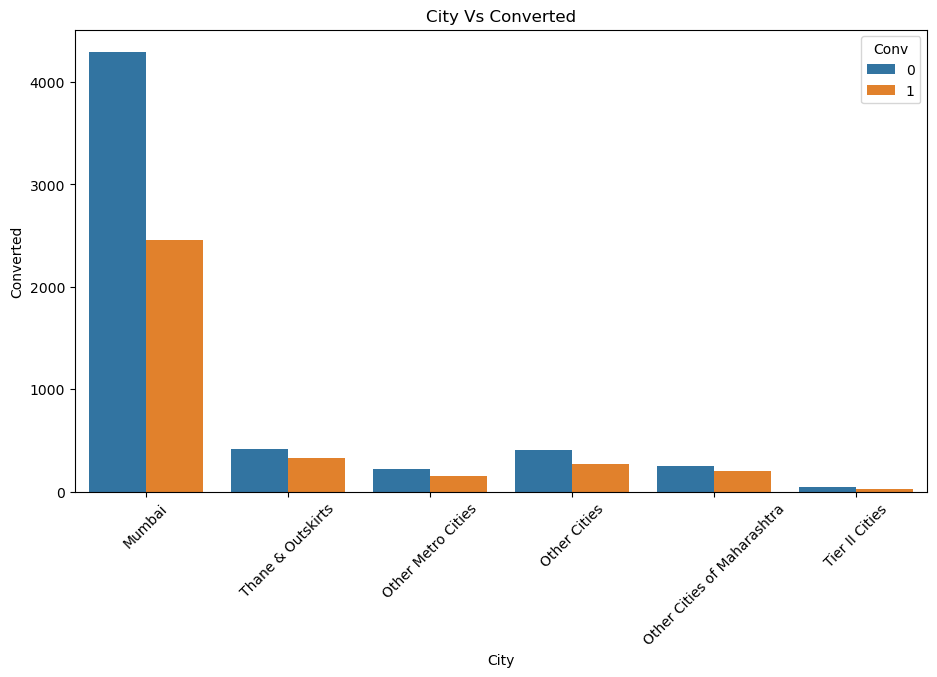

In [141]:
#Visualizing "City"

plt.figure(figsize=(11,6))
sns.countplot(x='City',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Converted')
plt.title('City Vs Converted')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

#### Observation
The majority of leads originate from Mumbai, where the conversion rate is around 50%.

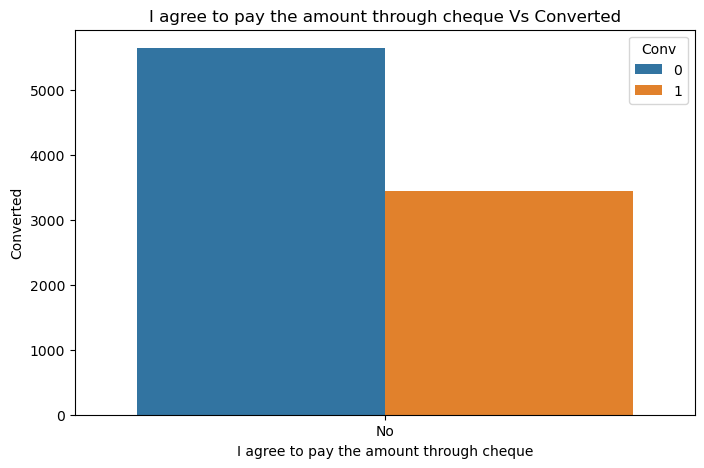

In [144]:
#Visualizing "I agree to pay the amount through cheque"

plt.figure(figsize=(8,5))
sns.countplot(x='I agree to pay the amount through cheque',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('I agree to pay the amount through cheque')
plt.ylabel('Converted')
plt.title('I agree to pay the amount through cheque Vs Converted')

# Show the plot
plt.show()

#### Observation:
Most leads are from 'No' category so not much of inferences be made for conversion, so can be dropped

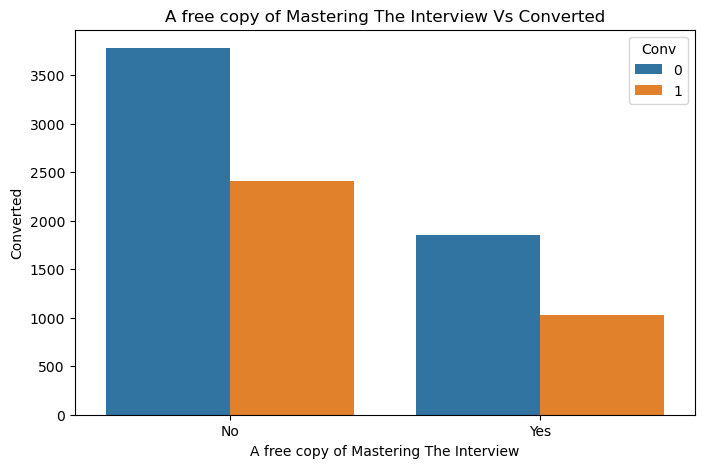

In [146]:
#Visualizing "A free copy of Mastering The Interview"

plt.figure(figsize=(8,5))
sns.countplot(x='A free copy of Mastering The Interview',hue='Conv',data=leads)

# Add labels and title
plt.xlabel('A free copy of Mastering The Interview')
plt.ylabel('Converted')
plt.title('A free copy of Mastering The Interview Vs Converted')

# Show the plot
plt.show()

##### Observation:
 This looks to be an informative column for the customer profilestand point, and most of the values are of No categorycould not make any inferences, this variable can be fropped

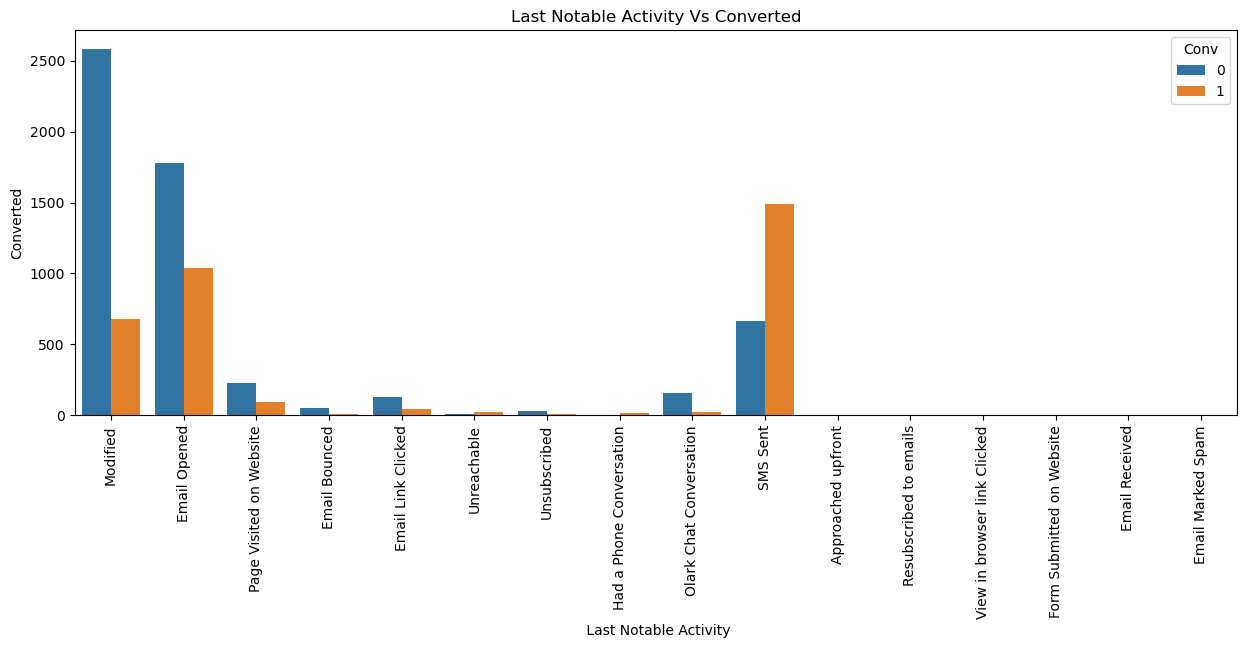

In [149]:
#Visualizing " Last Notable Activity"

plt.figure(figsize=(15,5))
sns.countplot(x='Last Notable Activity',hue='Conv',data=leads)

# Add labels and title
plt.xlabel(' Last Notable Activity')
plt.ylabel('Converted')
plt.title('Last Notable Activity Vs Converted')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

#### Observation:
Most leads fall under the "Last Notable" activities of Modified, Email Opened, and SMS Sent. Among these, SMS Sent has the highest conversion rate, while Modified has the most leads. Therefore, attention should be given to both the Modified and Email Opened categories as well.

#### Based on the above univariate analysis, we've determined that many columns do not contribute valuable information to the model. Therefore, we can drop these columns for further analysis.


In [161]:
#Below are list variables that are insignificant for predicting target variables, hence we can safely drop b

drop_col_list = ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [162]:
leads.drop(drop_col_list, axis= 1, inplace = True)

In [176]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

### Dummy variables for the categorical features

In [191]:
#Changing  variables (Yes/No) to binary 1/0

leads[['Do Not Email', 'Do Not Call']] = leads[['Do Not Email', 'Do Not Call']].replace({'Yes': 1, 'No': 0})

In [194]:
leads[['Do Not Email', 'Do Not Call']]

,Do Not Email,Do Not Call
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,0
9237,1,0
9238,0,0


In [275]:
# dummy variable for the categorical variables and dropping the first one.
leads = leads1
leads_dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']],drop_first=True)

In [277]:
leads_dummy.shape

(9074, 70)

In [278]:
leads_dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
 

In [223]:
leads_dummy_cols = ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked']

In [280]:
#Converting True, False to binary vslues 1,0

leads_dummy[leads_dummy_cols] = leads_dummy[leads_dummy_cols].replace({True: 1, False: 0})

In [281]:
leads_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [282]:
# Adding the dummy_data to the lead_data dataframe

leads = pd.concat([leads, leads_dummy], axis=1)

In [283]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [284]:
# Drop the columns of which dummies got created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [285]:
leads.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreac

In [232]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into train and test datasets

In [288]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X by droping ID columns
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [289]:
# assigning target variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [407]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the features

In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [292]:
# Checking the Lead Conversion rate
Converted = 100*sum(leads['Converted'])/len(leads['Converted'].index)
Converted

37.85541106458012

#### lead conversion rate is approximately 38%.

### Feature Selection Using RFE

In [295]:
from sklearn.linear_model import LogisticRegression
logregrsn = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logregrsn, n_features_to_select = 40)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [304]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False])

In [305]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 12),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Marked Spam', True, 1),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Email Received', False, 23),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Las

In [306]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]

In [307]:
Cols 

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Specialization_Others',
 'What is your current occupation_Housewife',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Unreachable']

## Model Building

#### Evaluating the model using StatsModels.

##### ML Model_1

In [308]:
import statsmodels.api as sm

In [309]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.1
Date:                Mon, 27 May 2024   Deviance:                       5130.3
Time:                        09:41:20   Pearson chi2:                 6.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3433      1.109      1.212      0.226      -0.830       3.516
Do Not Email                                            -1.6201      0.222     -7.284      0.000      -2.056      -1.184
Do Not Call                                             21.6273    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1093      0.041     26.964      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1022      0.131     -8.432      0.000      -1.358      -0.846
Lead Origin_Lead Add Form                                1.4805      0.894      1.656      0.098      -0.272       3.233
Lead Origin_Lead Import                                  0.9242      0.477      1.939      0.053      -0.010       1.858
Lead Source_Olark Chat                                   1.1055      0.125      8.854      0.000       0.861       1.350
Lead Source_Reference                                    1.8345      0.918      1.998      0.046       0.035       3.634
Lead Source_Welingak Website                             4.4030      1.150      3.828      0.000       2.149       6.657
Last Activity_Converted to Lead                         -0.9823      0.245     -4.002      0.000      -1.463      -0.501
Last Activity_Email Bounced                             -1.1303      0.646     -1.749      0.080      -2.397       0.136
Last Activity_Email Marked Spam                         10.9291   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.5421      0.355     -1.527      0.127      -1.238       0.154
Last Activity_Had a Phone Conversation                   1.9024      1.156      1.645      0.100      -0.364       4.169
Last Activity_Olark Chat Conversation                   -1.2820      0.214     -5.978      0.000      -1.702      -0.862
Last Activity_Page Visited on Website                   -0.3051      0.234     -1.304      0.192      -0.764       0.154
Last Activity_Resubscribed to emails                    11.6162   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4630      0.177      2.620      0.009       0.117       0.809
Last Activity_Unsubscribed                               0.8455      0.890      0.950      0.342      -0.898       2.589
Last Activity_View in browser link Clicked              -0.7169      1.161     -0.617      0.537      -2.992       1.559
Specialization_Hospitality Management                   -0.4318      0.330     -1.310      0.190      -1.078       0.214
Specialization_Media and Advertising                    -0

##### As we can observe Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [314]:
# Drop the column 'What is your current occupation_Housewife'
cols_drop = ['What is your current occupation_Housewife','Last Activity_Email Marked Spam','Do Not Call','Last Notable Activity_Resubscribed to emails','Last Activity_Resubscribed to emails']
cols = cols.drop(cols_drop )

#### ML Model_2

In [316]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.7
Date:                Mon, 27 May 2024   Deviance:                       5137.5
Time:                        09:48:27   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3117      1.053      2.196      0.028       0.248       4.375
Do Not Email                                            -1.6310      0.223     -7.309      0.000      -2.068      -1.194
Total Time Spent on Website                              1.1083      0.041     26.958      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.0981      0.130     -8.417      0.000      -1.354      -0.842
Lead Origin_Lead Add Form                                1.4807      0.894      1.657      0.098      -0.271       3.232
Lead Origin_Lead Import                                  0.9241      0.477      1.939      0.053      -0.010       1.858
Lead Source_Olark Chat                                   1.1078      0.125      8.877      0.000       0.863       1.352
Lead Source_Reference                                    1.8578      0.918      2.025      0.043       0.059       3.656
Lead Source_Welingak Website                             4.4053      1.150      3.831      0.000       2.151       6.659
Last Activity_Converted to Lead                         -0.9891      0.245     -4.033      0.000      -1.470      -0.508
Last Activity_Email Bounced                             -1.1282      0.646     -1.746      0.081      -2.395       0.139
Last Activity_Form Submitted on Website                 -0.5652      0.354     -1.595      0.111      -1.260       0.129
Last Activity_Had a Phone Conversation                   1.8978      1.157      1.641      0.101      -0.369       4.165
Last Activity_Olark Chat Conversation                   -1.2810      0.213     -6.007      0.000      -1.699      -0.863
Last Activity_Page Visited on Website                   -0.3241      0.234     -1.385      0.166      -0.783       0.135
Last Activity_SMS Sent                                   0.4544      0.177      2.574      0.010       0.108       0.800
Last Activity_Unsubscribed                               0.4466      0.896      0.499      0.618      -1.309       2.202
Last Activity_View in browser link Clicked              -0.8462      1.173     -0.721      0.471      -3.146       1.454
Specialization_Hospitality Management                   -0.4359      0.330     -1.322      0.186      -1.082       0.210
Specialization_Media and Advertising                    -0.3431      0.229     -1.500      0.134      -0.792       0.105
Specialization_Others                                   -1.1414      0.127     -8.952      0.000      -1.391      -0.891
Specialization_Services Excellence                      -0.4437      0.658     -0.674      0.500      -1.734       0.847
What is your current occupation_Student                 -1

In [327]:
col3_drop = ['Lead Origin_Lead Add Form','Lead Origin_Lead Import','Last Activity_View in browser link Clicked','Specialization_Hospitality Management','Specialization_Media and Advertising','Specialization_Services Excellence',
'City_Tier II Cities','Last Notable Activity_Email Bounced','What is your current occupation_Student','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam',
'Last Notable Activity_Email Opened','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Activity_Page Visited on Website','Lead Origin_Lead Add Form','Last Activity_Email Bounced','Last Activity_Form Submitted on Website','Last Activity_Had a Phone Conversation']

In [328]:
col3_drop

['Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Last Activity_View in browser link Clicked',
 'Specialization_Hospitality Management',
 'Specialization_Media and Advertising',
 'Specialization_Services Excellence',
 'City_Tier II Cities',
 'Last Notable Activity_Email Bounced',
 'What is your current occupation_Student',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unreachable',
 'Last Activity_Page Visited on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation']

In [329]:
col3 = cols.drop(col3_drop)

#### ML Model_3

In [330]:
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.9
Date:                Mon, 27 May 2024   Deviance:                       5217.9
Time:                        10:59:10   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5484      0.240      2.289      0.022       0.079       1.018
Do Not Email                                            -1.6668      0.188     -8.847      0.000      -2.036      -1.298
Total Time Spent on Website                              1.0982      0.040     27.226      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1811      0.127     -9.268      0.000      -1.431      -0.931
Lead Source_Olark Chat                                   1.0475      0.122      8.578      0.000       0.808       1.287
Lead Source_Reference                                    3.2779      0.242     13.556      0.000       2.804       3.752
Lead Source_Welingak Website                             5.8178      0.730      7.972      0.000       4.387       7.248
Last Activity_Converted to Lead                         -0.6182      0.231     -2.680      0.007      -1.070      -0.166
Last Activity_Olark Chat Conversation                   -0.9011      0.198     -4.547      0.000      -1.290      -0.513
Last Activity_SMS Sent                                   1.2484      0.077     16.301      0.000       1.098       1.398
Last Activity_Unsubscribed                               1.2980      0.481      2.697      0.007       0.355       2.241
Specialization_Others                                   -1.1704      0.125     -9.337      0.000      -1.416      -0.925
What is your current occupation_Unemployed              -0.5629      0.213     -2.645      0.008      -0.980      -0.146
What is your current occupation_Working Professional     2.0892      0.284      7.351      0.000       1.532       2.646
Last Notable Activity_Modified                          -0.8454      0.088     -9.588      0.000      -1.018      -0.673
Last Notable Activity_Olark Chat Conversation           -0.5757      0.376     -1.531      0.126      -1.313       0.161
Last Notable Activity_Page Visited on Website           -0.3678      0.199     -1.850      0.064      -0.757       0.022
========================================================================================================================
"""

In [331]:
# Basis the above observation Pvalue is high for the variable Last Notable Activity_Olark Chat Conversation,hence drioping

col3 = col3.drop('Last Notable Activity_Olark Chat Conversation')

#### ML Model_4

In [332]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.2
Date:                Mon, 27 May 2024   Deviance:                       5220.3
Time:                        11:03:16   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5439      0.239      2.272      0.023       0.075       1.013
Do Not Email                                            -1.6734      0.188     -8.903      0.000      -2.042      -1.305
Total Time Spent on Website                              1.0951      0.040     27.202      0.000       1.016       1.174
Lead Origin_Landing Page Submission                     -1.1854      0.127     -9.301      0.000      -1.435      -0.936
Lead Source_Olark Chat                                   1.0441      0.122      8.549      0.000       0.805       1.283
Lead Source_Reference                                    3.2707      0.242     13.530      0.000       2.797       3.745
Lead Source_Welingak Website                             5.7953      0.729      7.950      0.000       4.366       7.224
Last Activity_Converted to Lead                         -0.6434      0.230     -2.799      0.005      -1.094      -0.193
Last Activity_Olark Chat Conversation                   -1.0667      0.173     -6.183      0.000      -1.405      -0.729
Last Activity_SMS Sent                                   1.2493      0.076     16.331      0.000       1.099       1.399
Last Activity_Unsubscribed                               1.3062      0.481      2.718      0.007       0.364       2.248
Specialization_Others                                   -1.1746      0.125     -9.363      0.000      -1.420      -0.929
What is your current occupation_Unemployed              -0.5612      0.213     -2.639      0.008      -0.978      -0.144
What is your current occupation_Working Professional     2.0925      0.284      7.369      0.000       1.536       2.649
Last Notable Activity_Modified                          -0.8113      0.085     -9.540      0.000      -0.978      -0.645
Last Notable Activity_Page Visited on Website           -0.3591      0.199     -1.808      0.071      -0.748       0.030
========================================================================================================================
"""

In [334]:
# As per the above model P value is high Last Notable Activity_Page Visited on Website

col3 = col3.drop('Last Notable Activity_Page Visited on Website')

#### ML Model_5

In [335]:
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.8
Date:                Mon, 27 May 2024   Deviance:                       5223.7
Time:                        11:06:44   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5189      0.239      2.174      0.030       0.051       0.987
Do Not Email                                            -1.6876      0.188     -8.997      0.000      -2.055      -1.320
Total Time Spent on Website                              1.0941      0.040     27.189      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.1842      0.127     -9.296      0.000      -1.434      -0.935
Lead Source_Olark Chat                                   1.0515      0.122      8.613      0.000       0.812       1.291
Lead Source_Reference                                    3.2836      0.242     13.584      0.000       2.810       3.757
Lead Source_Welingak Website                             5.8041      0.729      7.960      0.000       4.375       7.233
Last Activity_Converted to Lead                         -0.6332      0.230     -2.755      0.006      -1.084      -0.183
Last Activity_Olark Chat Conversation                   -1.0559      0.172     -6.123      0.000      -1.394      -0.718
Last Activity_SMS Sent                                   1.2720      0.076     16.837      0.000       1.124       1.420
Last Activity_Unsubscribed                               1.3424      0.480      2.798      0.005       0.402       2.283
Specialization_Others                                   -1.1753      0.125     -9.373      0.000      -1.421      -0.930
What is your current occupation_Unemployed              -0.5637      0.212     -2.654      0.008      -0.980      -0.147
What is your current occupation_Working Professional     2.0915      0.284      7.374      0.000       1.536       2.647
Last Notable Activity_Modified                          -0.7941      0.085     -9.388      0.000      -0.960      -0.628
========================================================================================================================
"""

#### Checking for VIF values

In [337]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,9.53
2,Lead Origin_Landing Page Submission,5.67
10,Specialization_Others,4.00
3,Lead Source_Olark Chat,2.24
13,Last Notable Activity_Modified,2.07
8,Last Activity_SMS Sent,1.65
7,Last Activity_Olark Chat Conversation,1.64
12,What is your current occupation_Working Profes...,1.64
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


In [338]:
# As per the obove VIF values dropping the column  'What is your current occupation_Unemployed' due it has high VIF

col3 = col3.drop('What is your current occupation_Unemployed')

#### ML Model_6

In [339]:
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.3
Date:                Mon, 27 May 2024   Deviance:                       5230.6
Time:                        11:13:15   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0186      0.125     -0.148      0.882      -0.264       0.227
Do Not Email                                            -1.6844      0.188     -8.971      0.000      -2.052      -1.316
Total Time Spent on Website                              1.0946      0.040     27.213      0.000       1.016       1.173
Lead Origin_Landing Page Submission                     -1.1880      0.127     -9.320      0.000      -1.438      -0.938
Lead Source_Olark Chat                                   1.0571      0.122      8.658      0.000       0.818       1.296
Lead Source_Reference                                    3.2947      0.241     13.648      0.000       2.822       3.768
Lead Source_Welingak Website                             5.7970      0.729      7.951      0.000       4.368       7.226
Last Activity_Converted to Lead                         -0.6380      0.230     -2.774      0.006      -1.089      -0.187
Last Activity_Olark Chat Conversation                   -1.0481      0.172     -6.084      0.000      -1.386      -0.710
Last Activity_SMS Sent                                   1.2580      0.075     16.719      0.000       1.111       1.406
Last Activity_Unsubscribed                               1.3191      0.480      2.749      0.006       0.379       2.260
Specialization_Others                                   -1.1858      0.126     -9.445      0.000      -1.432      -0.940
What is your current occupation_Working Professional     2.6376      0.196     13.477      0.000       2.254       3.021
Last Notable Activity_Modified                          -0.8003      0.085     -9.466      0.000      -0.966      -0.635
========================================================================================================================
"""

In [341]:
# Dropping the variable Last Activity_Unsubscribed as this  hold Pvalueand looks to be not of much rlevance

col3 = col3.drop('Last Activity_Unsubscribed')

#### ML Model_7

In [342]:
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.6
Date:                Mon, 27 May 2024   Deviance:                       5237.3
Time:                        11:30:25   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0092      0.125     -0.073      0.941      -0.254       0.236
Do Not Email                                            -1.5354      0.175     -8.796      0.000      -1.878      -1.193
Total Time Spent on Website                              1.0956      0.040     27.250      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1908      0.127     -9.341      0.000      -1.441      -0.941
Lead Source_Olark Chat                                   1.0576      0.122      8.666      0.000       0.818       1.297
Lead Source_Reference                                    3.2821      0.241     13.623      0.000       2.810       3.754
Lead Source_Welingak Website                             5.7638      0.728      7.919      0.000       4.337       7.190
Last Activity_Converted to Lead                         -0.6395      0.230     -2.780      0.005      -1.090      -0.189
Last Activity_Olark Chat Conversation                   -1.0534      0.172     -6.118      0.000      -1.391      -0.716
Last Activity_SMS Sent                                   1.2436      0.075     16.599      0.000       1.097       1.390
Specialization_Others                                   -1.1865      0.125     -9.454      0.000      -1.432      -0.940
What is your current occupation_Working Professional     2.6384      0.195     13.518      0.000       2.256       3.021
Last Notable Activity_Modified                          -0.8069      0.084     -9.552      0.000      -0.972      -0.641
========================================================================================================================
"""

In [343]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.19
3,Lead Source_Olark Chat,2.05
11,Last Notable Activity_Modified,2.00
2,Lead Origin_Landing Page Submission,1.71
7,Last Activity_Olark Chat Conversation,1.64
8,Last Activity_SMS Sent,1.58
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
6,Last Activity_Converted to Lead,1.24
10,What is your current occupation_Working Profes...,1.18


#### Given that the p-values for all variables are 0 and the VIF values are low, model-7 is our final model. This final model consists of 12 variables.

#### Making Prediction on the Train set

In [344]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.201717
1012    0.132949
9226    0.337388
4750    0.863417
7987    0.809557
1281    0.740383
2880    0.102885
4971    0.965117
7536    0.858440
1248    0.781128
dtype: float64

In [345]:
# Changing into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20171746, 0.13294855, 0.3373885 , 0.86341713, 0.80955669,
       0.74038339, 0.10288535, 0.96511668, 0.85843985, 0.7811281 ])

##### Building a DataFrame that includes the actual Converted flag and the predicted probabilities.

In [346]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.201717,3009
1,0,0.132949,1012
2,0,0.337388,9226
3,1,0.863417,4750
4,1,0.809557,7987


#### Adding new column 'predicted' with the cutoff probablilty as 1 if Converted_Prob > 0.5 else 0

In [349]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.201717,3009,0
1,0,0.132949,1012,0
2,0,0.337388,9226,0
3,1,0.863417,4750,1
4,1,0.809557,7987,1


### Confusion matrix

In [352]:
from sklearn import metrics

# Confusion matrix 
confusion_mtrx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mtrx)

[[3468  437]
 [ 717 1729]]


In [354]:
# We can observe that depicted here the values from above confusion matrix
# Actual
# not_converted        3461      444
# converted            719       1727  

In [355]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8182963312864115


#### Metrics for the model validation

In [358]:
TP = confusion_mtrx[1,1] # true positive 
TN = confusion_mtrx[0,0] # true negatives
FP = confusion_mtrx[0,1] # false positives
FN = confusion_mtrx[1,0] # false negatives

#### Specificity

In [360]:
Specificity = TN / float(TN+FP)
print("Specificity: ",Specificity)

Specificity:  0.8880921895006402


#### Sensivity

In [361]:
Sensitivity = TP / float(TP+FN)
print("Sensitivity : ",Sensitivity)

Sensitivity :  0.7068683565004088


#### False Positive Rate

In [363]:
False_Positive_Rate = FP/ float(TN+FP)
print("False Positive Rate: ",False_Positive_Rate)

False Positive Rate:  0.1119078104993598


#### True Positives

In [364]:
True_Positive = TP / float(TP+FP)
print("True Positives: ",True_Positive)

True Positives:  0.7982456140350878


#### True Negatives

In [365]:
True_Negative = TN / float(TN+ FN)
print("True Negatives: ", True_Negative)

True Negatives:  0.828673835125448


#### Plotting the ROC Curve

An ROC curve illustrates below key points:

1. 
It demonstrates the tradeoff between sensitivity and specificity, indicating that an increase in sensitivity results in a decrease in specificity

2. 
The more the curvetowardss the left-hand border and then the top border of the ROC space, the more accurate the test
   
3. The nearer the curve is to the 45-degree diagonal in the ROC space, the less accurate the test.



..

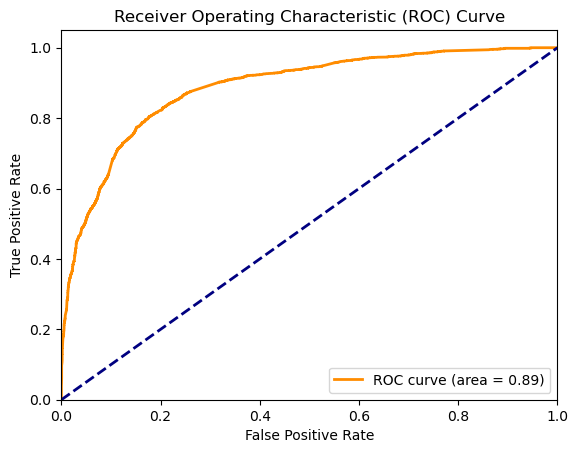

In [368]:
# Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Observation:

#### The ROC area, or area under the curve, is approximately 89%, indicating that the model is sufficiently accurate to be considered effective.

#### Optimal Cutoff Point

##### Previously, we arbitrarily selected a cut-off value of 0.5. Now, we aim to identify the optimal cut-off value. This section focuses on determining the cut-off probability where sensitivity and specificity are balanced.

In [369]:
# Generate a list of threshold values ranging from 0 to 0.9
thresholds = [float(x) / 10 for x in range(10)]

# Iterate over each threshold value
for threshold in thresholds:
    # Create a new column in y_train_pred_final DataFrame based on threshold
    y_train_pred_final[threshold] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > threshold else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.201717,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.132949,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.337388,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.863417,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.809557,7987,1,1,1,1,1,1,1,1,1,1,0


In [373]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.584790  0.974244  0.340845
0.2   0.2  0.743505  0.914554  0.636364
0.3   0.3  0.801134  0.848324  0.771575
0.4   0.4  0.818296  0.775552  0.845070
0.5   0.5  0.818296  0.706868  0.888092
0.6   0.6  0.798457  0.601799  0.921639
0.7   0.7  0.784443  0.524939  0.946991
0.8   0.8  0.759723  0.420687  0.972087
0.9   0.9  0.718942  0.290679  0.987196


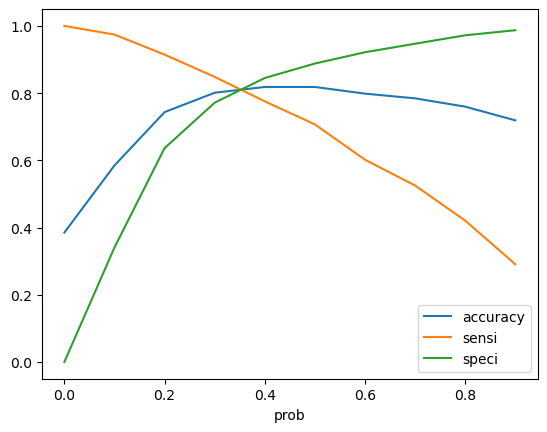

In [374]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Based on the curve above, the optimal cutoff probability appears to be 0.35.

In [375]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201717,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.132949,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.337388,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.863417,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.809557,7987,1,1,1,1,1,1,1,1,1,1,0,1


##### Assigning Lead Score to the Training data

In [376]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.201717,3009,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.132949,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.337388,9226,0,1,1,1,1,0,0,0,0,0,0,0,34
3,1,0.863417,4750,1,1,1,1,1,1,1,1,1,1,0,1,86
4,1,0.809557,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


#### Model Evaluation

In [378]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8110533774208786


In [379]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3155,  750],
       [ 450, 1996]], dtype=int64)

In [380]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [381]:
# sensitivity of logistic regression model
Sensitivity_tst = TP / float(TP+FN)

print("Sensitivity : ",Sensitivity_tst)

Sensitivity :  0.8160261651676206


In [382]:
# specificity
Specificity_test = TN / float(TN+FP)

print("Specificity :", Specificity_test)

Specificity : 0.8079385403329066


In [383]:
##### Positive predictive value 

PPV = TP / float(TP+FP)

print("Positive predictive value: ", PPV)

Positive predictive value:  0.7268754552075747


In [384]:
# Negative predictive value
npv = TN / float(TN+ FN)

print("Negative Predictive Value : ",npv)

Negative Predictive Value :  0.8751733703190014


#### Precision and Recall

Precision: Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recal:     Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [386]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3468,  437],
       [ 717, 1729]], dtype=int64)

In [387]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7982456140350878


In [388]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))
Recall : 0.7060506950122649

Recall : 0.7068683565004088


In [389]:
from sklearn.metrics import precision_score, recall_score

In [390]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7982456140350878


In [391]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7068683565004088


##### Precision and recall tradeoff

In [392]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [394]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

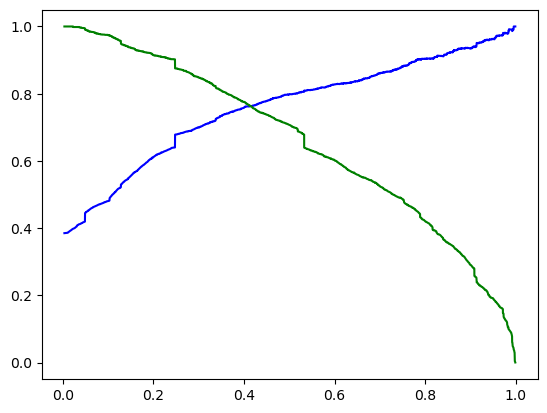

In [396]:
# trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

#### Predictions on the test set

In [408]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [409]:
#Columns selected by the final model to the X_test 

X_test = X_test[col3]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [410]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.135445
1490    0.970861
7936    0.117069
4216    0.816448
3830    0.136585
1800    0.649664
6507    0.338344
4821    0.309446
4223    0.913451
4714    0.337388
dtype: float64

In [411]:
# Convert array y_test_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [412]:
y_pred_1.head()

,0
3271,0.135445
1490,0.970861
7936,0.117069
4216,0.816448
3830,0.136585


In [413]:
# Convert y_test array to dataframe
y_test_df = pd.DataFrame(y_test)

In [414]:
#Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [415]:
# Droping index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [416]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [417]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.135445
1,1,1490,0.970861
2,0,7936,0.117069
3,1,4216,0.816448
4,0,3830,0.136585


In [418]:
# Renaming the column 

y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_prob'}) 

In [421]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.135445
1,1490,1,0.970861
2,7936,0,0.117069
3,4216,1,0.816448
4,3830,0,0.136585


In [425]:
# Final predicted basisthe cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.135445,0
1,1490,1,0.970861,1
2,7936,0,0.117069,0
3,4216,1,0.816448,1
4,3830,0,0.136585,0


In [426]:
#Accuracy

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8035255233198678


In [427]:
# Creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1395,  339],
       [ 196,  793]], dtype=int64)

In [428]:
# Assigning the values for TP,TN,FP,FN

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [429]:
# Sensitivity

Sensitivity = TP / float(TP+FN)
print("Sensitivity :",Sensitivity)

Sensitivity : 0.8018200202224469


In [430]:
# specificity

Specificity = TN / float(TN+FP)
print("Specificity :", Specificity)

Specificity : 0.8044982698961938


#### Assign lead scores to the test data set

In [431]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.135445,0,14
1,1490,1,0.970861,1,97
2,7936,0,0.117069,0,12
3,4216,1,0.816448,1,82
4,3830,0,0.136585,0,14


### Observations of the model on  testdata

#### Accuracy : 80.35 %
#### Sensitivity : 80.18 %
#### Specificity : 80.45 %

#### Results :

#### Metrics for Train Data

#### Accuracy : 81.11 %
#### Sensitivity : 80.6 %
#### Specificity : 80.8 %

### Inference: We have successfully estimated the target lead conversion rate to be around 80%. The model predicts the conversion rate accurately, providing the CEO with confidence to make informed decisions based on this model to achieve a higher lead conversion rate of 80%.

#### Leads to be contacted:

In [432]:
imp_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
imp_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.970861,1,97
8,4223,1,0.913451,1,91
16,1946,1,0.921155,1,92
21,2461,1,0.992141,1,99
23,5822,1,0.997937,1,100
...,...,...,...,...,...
2694,1566,1,0.950703,1,95
2699,6461,1,0.960745,1,96
2703,5741,1,0.906712,1,91
2715,6299,1,0.871318,1,87


### Propect Ids to be contacted

In [438]:
print("Critical leads to be contacted for the conversion are below:")
print("*********==========================================================********")
print(imp_leads['Prospect ID'].values)

Critical leads to be contacted for the conversion are below:
*********==========================================================********
[1490 4223 1946 2461 5822 2684 2010 4062 7696 9049 1518 4543 4830 4365
 3542 2504 7674 8596 4003 4963 6947 4807  446  789 5805 3758  337 1561
 5367  737 6423 8286 7174 4461 1436 7552 3932 4080 1475 5785 2860 7253
 4297 5490 1995 4498 5797 8687  831 7653 2018 6743 3976 5769 1051 1663
 3288 8959 7521 8282 8213 9063 5292 6913 1481  785 3265 3285 7433 3858
 3810 2009 8106  373 7417 4179 8568 7268 6784 6754 2960 7753 3983  802
 8745 4717  505 8509 6094 4992 7036 2680 7065  112 6149 7157 7175 1675
 6999 5826 8492 6499 2481 3439 4612 7129 4793 4837 2495  822 2378 5075
 7699 5638 2342 8077 2727  720 7489 2961 1542 5656 2630 6728 8205 6332
 8461 2427 5087  174 2674 8065 2095 1568 8597 4865 3535 4708 1304 6066
 6538 5700 1388 5815 7970 7902 5804 7805 5042 4081 6684 5440 1927 5032
 5824   64  170 2650 5808 4578 4803 1470 5810 2473 2584 2578 7259 3727
 1454 3150 

### Identifying the significant features from our final model:

In [439]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.763807
Lead Source_Reference                                   3.282130
What is your current occupation_Working Professional    2.638404
Last Activity_SMS Sent                                  1.243621
Total Time Spent on Website                             1.095578
Lead Source_Olark Chat                                  1.057555
const                                                  -0.009185
Last Activity_Converted to Lead                        -0.639506
Last Notable Activity_Modified                         -0.806897
Last Activity_Olark Chat Conversation                  -1.053400
Specialization_Others                                  -1.186463
Lead Origin_Landing Page Submission                    -1.190838
Do Not Email                                           -1.535389
dtype: float64

# "*Recommendations*"

1.	##### The X Education company should prioritize making calls to leads from "Welingak Websites" and "Reference" as they are more likely to convert.
2.	##### The X Education company should focus on contacting "working professionals" as they have a higher likelihood of conversion.
3.	##### The X Education company should target leads who spent more time on the website as they are more likely to convert.
4.	##### The X Education company should prioritize making calls to leads from "Olark Chat" as they have a higher chance of conversion.
5.	##### The X Education company should prioritize contacting leads whose last activity was SMS Sent as they are more likely to convert.
6.	##### The X Education company should avoid contacting leads whose last activity was "Olark Chat Conversation" as they are unlikely to convert.
7.	##### The X Education company should refrain from contacting leads whose lead origin is "Landing Page Submission" as they are unlikely to convert.
8.	##### The X Education company should avoid contacting leads whose Specialization is "Others" as they are unlikely to convert.
9.	##### The X Education company should avoid contacting leads who have chosen "Do not Email" as "yes" as they are unlikely to convert.
